In [1]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import os
HOME = os.getcwd()
HOME

'/content'

In [2]:
!pip install ultralytics==8.0.20
from IPython import display
import ultralytics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.2/261.2 KB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 KB 23.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 44.7 MB/s eta 0:00:00


In [2]:
from ultralytics import YOLO
from IPython.display import display, Image

In [4]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="owC1whkrCOzKe9DjpF13")
project = rf.workspace("thesisp2segmentation").project("yolov5seg-p0vlj")
dataset = project.version(4).download("yolov8")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 KB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 KB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 KB 8.5 MB/s eta 0:00:00
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9674 sha256=594739e80ae353eb92f6575253847ac3e66b3e9f7e7535ca06230d2bf4be351f
  Stored in directory: /root/.cache/pip/wheels/bd/a8/c3/3cf2c14a1837a4e04bd98631724e81f33f462d86a1d895fae0
Successfully built wget
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.0.9
    Uninstalling pyparsing-3.0.9:
      Successfully uninstalled pyparsing-3.0.9
  Attempting uninstall: cycler
    Found existing installation: cycler 0.11.0
    Uninstalling cycler-0.11.0:
      Successfully uninstalled cycler-0.11.0


loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to yolov5seg-4 in yolov8:: 100%|██████████| 9432/9432 [00:03<00:00, 2644.97it/s]


In [12]:
%cd {HOME}
!yolo task=segment mode=train model=yolov8n-seg.pt data={dataset.location}/data.yaml epochs=70 imgsz=640

/content
Ultralytics YOLOv8.0.20 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=segment, mode=train, model=yolov8n-seg.yaml, data=/content/yolov5seg-4/data.yaml, epochs=70, patience=50, batch=16, imgsz=640, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, 

In [15]:
%cd {HOME}
!yolo task=segment mode=val model={HOME}/runs/segment/train/weights/best.pt data={dataset.location}/data.yaml 

/content
Ultralytics YOLOv8.0.20 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-seg summary (fused): 195 layers, 3259429 parameters, 0 gradients, 12.0 GFLOPs
val: Scanning /content/yolov5seg-4/valid/labels.cache... 879 images, 0 backgrounds, 0 corrupt: 100% 879/879 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% 55/55 [00:19<00:00,  2.81it/s]
                   all        879       2590      0.653      0.659       0.62      0.392      0.645      0.649       0.61      0.332
           anthracnose        879        626      0.549      0.337      0.373      0.217      0.566      0.347      0.375      0.184
  cercospora-leaf-spot        879        402      0.767      0.741      0.756      0.439      0.749      0.724      0.749      0.351
cladosporium-leaf-spot        879       1013       0.73      0.918      0.848      0.587      0.726      0.912      0.844   

In [45]:
%cd {HOME}
!yolo task=segment mode=predict model={HOME}/runs/segment/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True, save_txt=True

/content
Ultralytics YOLOv8.0.20 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-seg summary (fused): 195 layers, 3259429 parameters, 0 gradients, 12.0 GFLOPs
image 1/417 /content/yolov5seg-4/test/images/20221223_164526_jpg.rf.0adcadd12b11e300f5030fe222a66ea9.jpg: 640x640 11 cercospora-leaf-spots, 10.0ms
image 2/417 /content/yolov5seg-4/test/images/20221223_164526_jpg.rf.736efd532a988123d4d907b7baf1e880.jpg: 640x640 11 cercospora-leaf-spots, 10.1ms
image 3/417 /content/yolov5seg-4/test/images/20221223_164526_jpg.rf.dc85ffc30044969dd5b5d6c53425f7a5.jpg: 640x640 11 cercospora-leaf-spots, 10.0ms
image 4/417 /content/yolov5seg-4/test/images/20221223_164543_jpg.rf.475254330ce45d4d207109b3d856ba8b.jpg: 640x640 13 cercospora-leaf-spots, 12.4ms
image 5/417 /content/yolov5seg-4/test/images/20221223_164543_jpg.rf.660deb9272de3aa875c63678dd6e0efb.jpg: 640x640 13 cercospora-leaf-spots, 10.6ms
image 6/417 /content/yolov5seg-4/test/images/20221223_164543_jpg.rf.7951320c22436eb

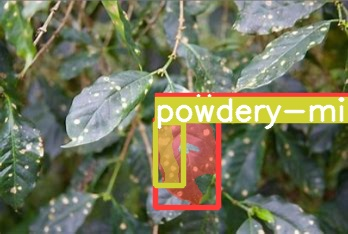

In [44]:
import glob 
from IPython.display import Image , display

for image_path in glob.glob(f'{HOME}/runs/segment/predict9/*.jpg')[:50]:
  display(Image(filename=image_path ,width=600))
  print("\n")

In [1]:
from PIL import Image

confusion_matrix = Image.open('confusion_matrix.png')

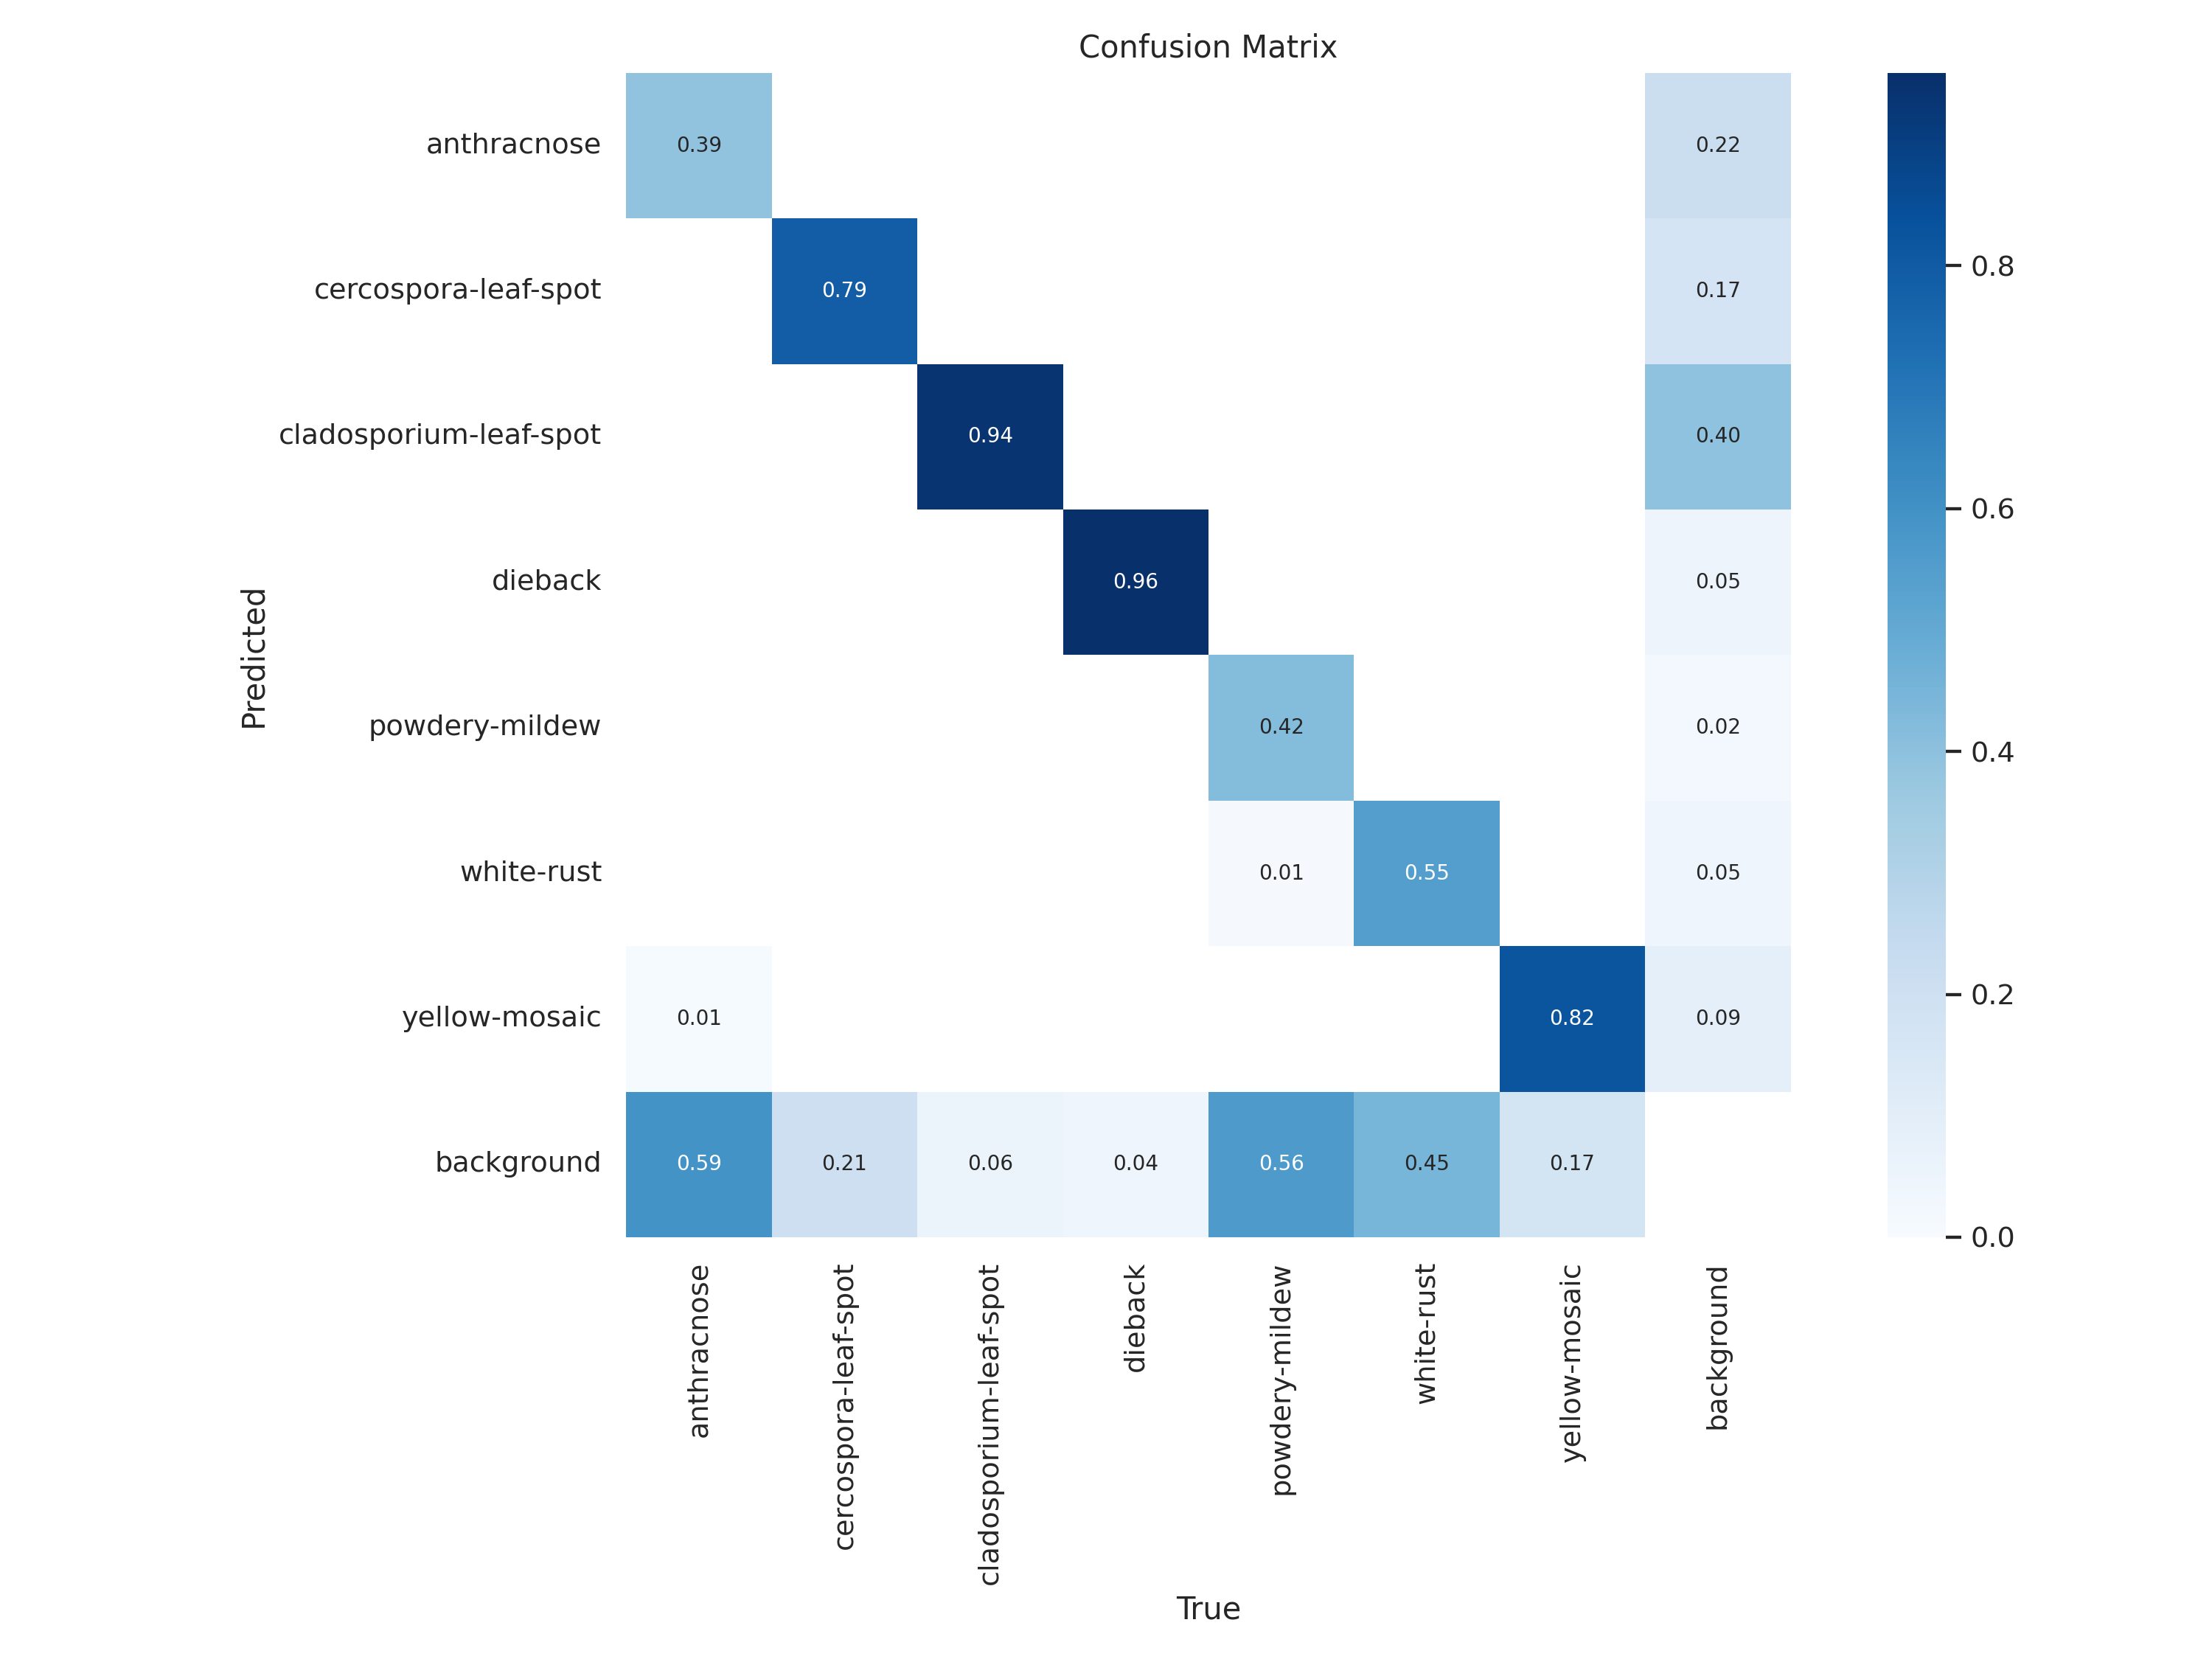

In [2]:
confusion_matrix

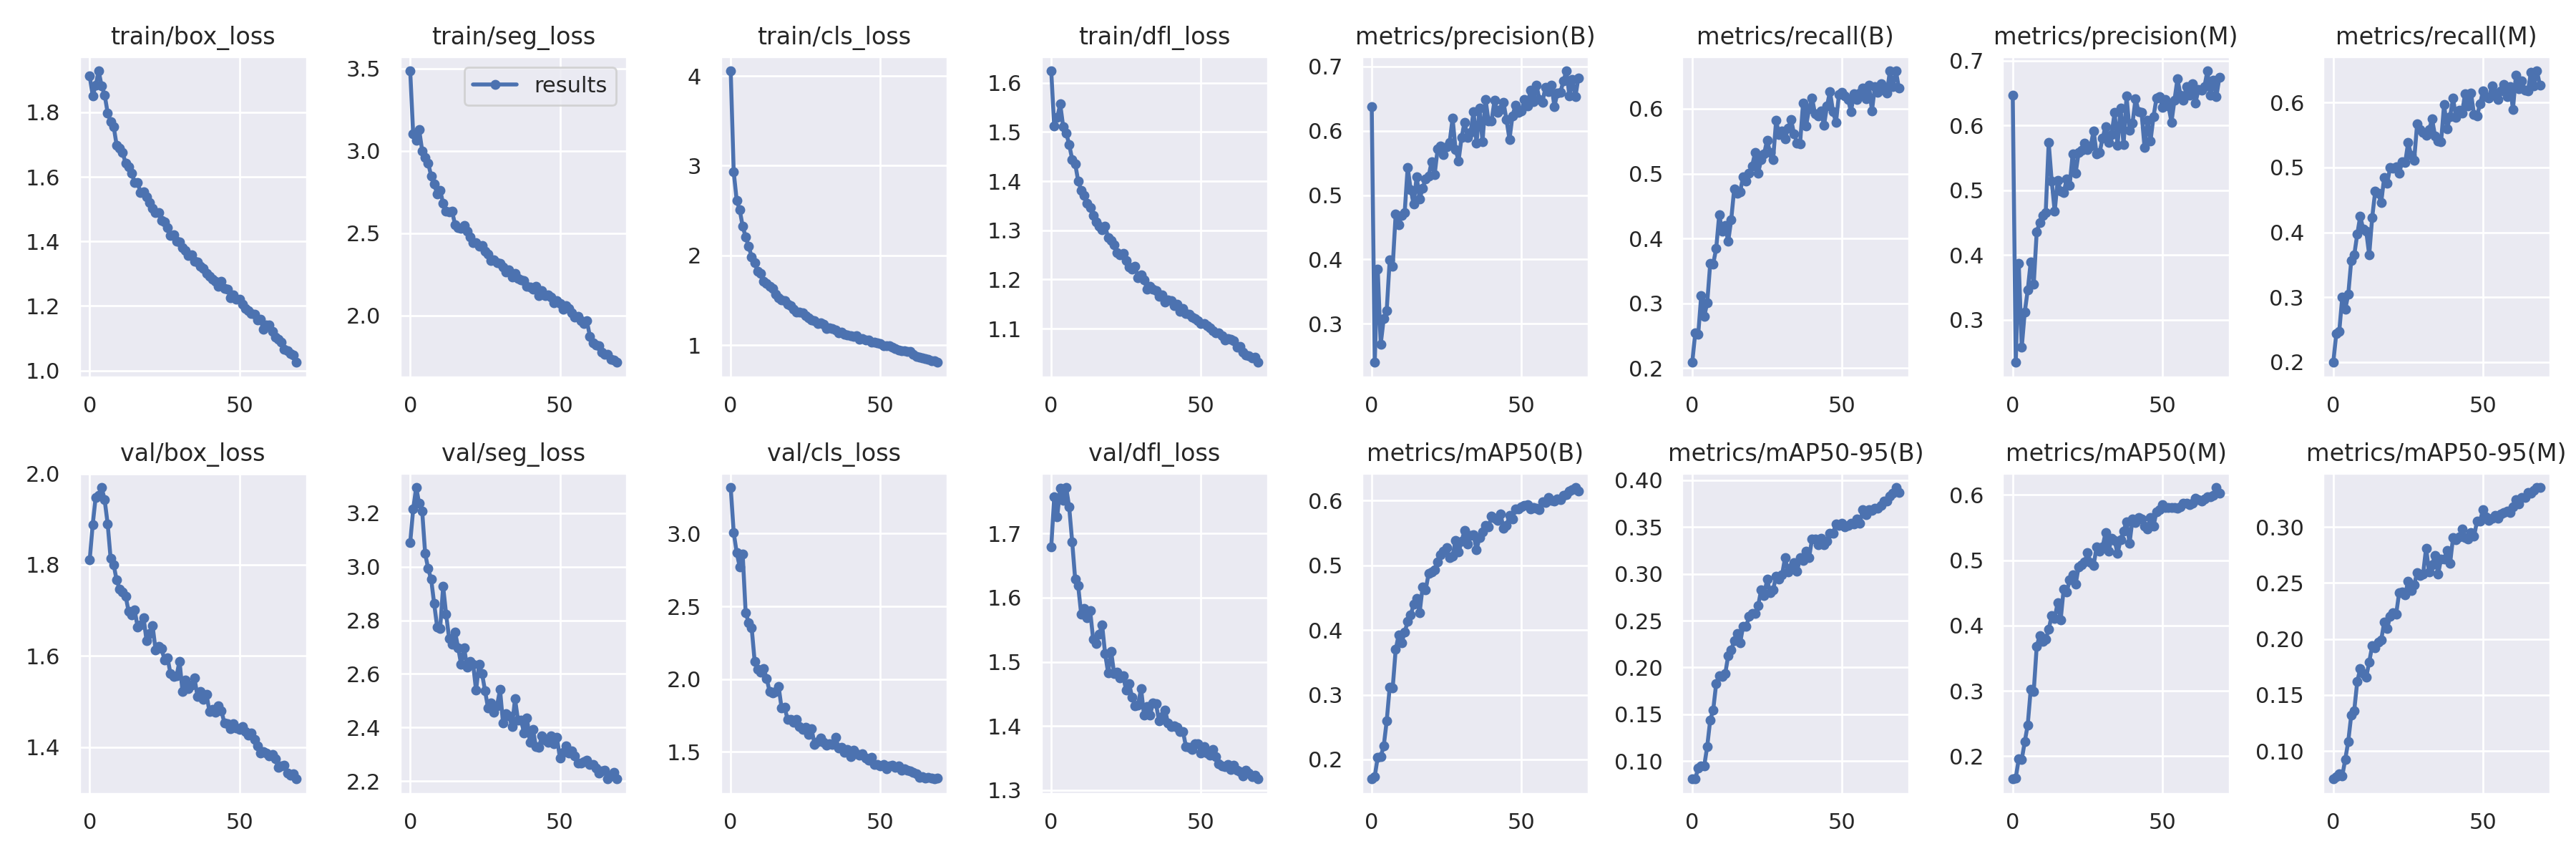

In [4]:
results = Image.open('results.png')
results

In [3]:
model = YOLO('best.pt')

In [9]:
model.save('yolo.h5')

AttributeError: 'YOLO' object has no attribute 'save'. See valid attributes below.

    YOLO (You Only Look Once) object detection model.

    Args:
        model (str, Path): Path to the model file to load or create.

    Attributes:
        predictor (Any): The predictor object.
        model (Any): The model object.
        trainer (Any): The trainer object.
        task (str): The type of model task.
        ckpt (Any): The checkpoint object if the model loaded from *.pt file.
        cfg (str): The model configuration if loaded from *.yaml file.
        ckpt_path (str): The checkpoint file path.
        overrides (dict): Overrides for the trainer object.
        metrics (Any): The data for metrics.

    Methods:
        __call__(source=None, stream=False, **kwargs):
            Alias for the predict method.
        _new(cfg:str, verbose:bool=True) -> None:
            Initializes a new model and infers the task type from the model definitions.
        _load(weights:str, task:str='') -> None:
            Initializes a new model and infers the task type from the model head.
        _check_is_pytorch_model() -> None:
            Raises TypeError if the model is not a PyTorch model.
        reset() -> None:
            Resets the model modules.
        info(verbose:bool=False) -> None:
            Logs the model info.
        fuse() -> None:
            Fuses the model for faster inference.
        predict(source=None, stream=False, **kwargs) -> List[ultralytics.yolo.engine.results.Results]:
            Performs prediction using the YOLO model.

    Returns:
        list(ultralytics.yolo.engine.results.Results): The prediction results.
    